In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the mushroom Dataset
dataset = pd.read_csv(os.path.join("mushrooms.csv"))
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
X = dataset.drop('class', axis=1)
X = pd.get_dummies(X)
print(X)
y = dataset['class']

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8119            0            0            0            1            0   
8120            0            0            0            0            0   
8121            0            0            1            0            0   
8122            0            0            0            1            0   
8123            0            0            0            0            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0               1              0          

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = classifier.predict(X_test)
print(y_pred)

['p' 'e' 'e' ... 'p' 'e' 'e']


In [16]:
y_test

380     p
3641    e
273     e
1029    e
684     e
       ..
3535    e
1643    e
6494    p
6       e
3175    e
Name: class, Length: 1625, dtype: object

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [20]:
classifier.feature_importances_

array([0.00000000e+00, 6.14559134e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.45373262e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.81376546e-03, 0.00000000e+00, 1.95091786e-02, 0.00000000e+00,
       0.00000000e+00, 2.38169546e-02, 0.00000000e+00, 6.21805700e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.82697077e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.69882411e-01, 0.00000000e+00, 8.72653511e-02,
      

In [42]:
X_train.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [48]:
zipped = zip(X_train.columns, classifier.feature_importances_)
list(zipped)

[('cap-shape_b', 0.0),
 ('cap-shape_c', 0.0006145591335178146),
 ('cap-shape_f', 0.0),
 ('cap-shape_k', 0.0),
 ('cap-shape_s', 0.0),
 ('cap-shape_x', 0.0),
 ('cap-surface_f', 0.0),
 ('cap-surface_g', 0.002453732619571231),
 ('cap-surface_s', 0.0),
 ('cap-surface_y', 0.0),
 ('cap-color_b', 0.0),
 ('cap-color_c', 0.0),
 ('cap-color_e', 0.0),
 ('cap-color_g', 0.0),
 ('cap-color_n', 0.0),
 ('cap-color_p', 0.0),
 ('cap-color_r', 0.0),
 ('cap-color_u', 0.0),
 ('cap-color_w', 0.0),
 ('cap-color_y', 0.0),
 ('bruises_f', 0.0018137654642038951),
 ('bruises_t', 0.0),
 ('odor_a', 0.019509178631487815),
 ('odor_c', 0.0),
 ('odor_f', 0.0),
 ('odor_l', 0.02381695461377303),
 ('odor_m', 0.0),
 ('odor_n', 0.621805700344243),
 ('odor_p', 0.0),
 ('odor_s', 0.0),
 ('odor_y', 0.0),
 ('gill-attachment_a', 0.0),
 ('gill-attachment_f', 0.0),
 ('gill-spacing_c', 0.0),
 ('gill-spacing_w', 0.0),
 ('gill-size_b', 0.005826970770145919),
 ('gill-size_n', 0.0),
 ('gill-color_b', 0.0),
 ('gill-color_e', 0.0),
 ('gill

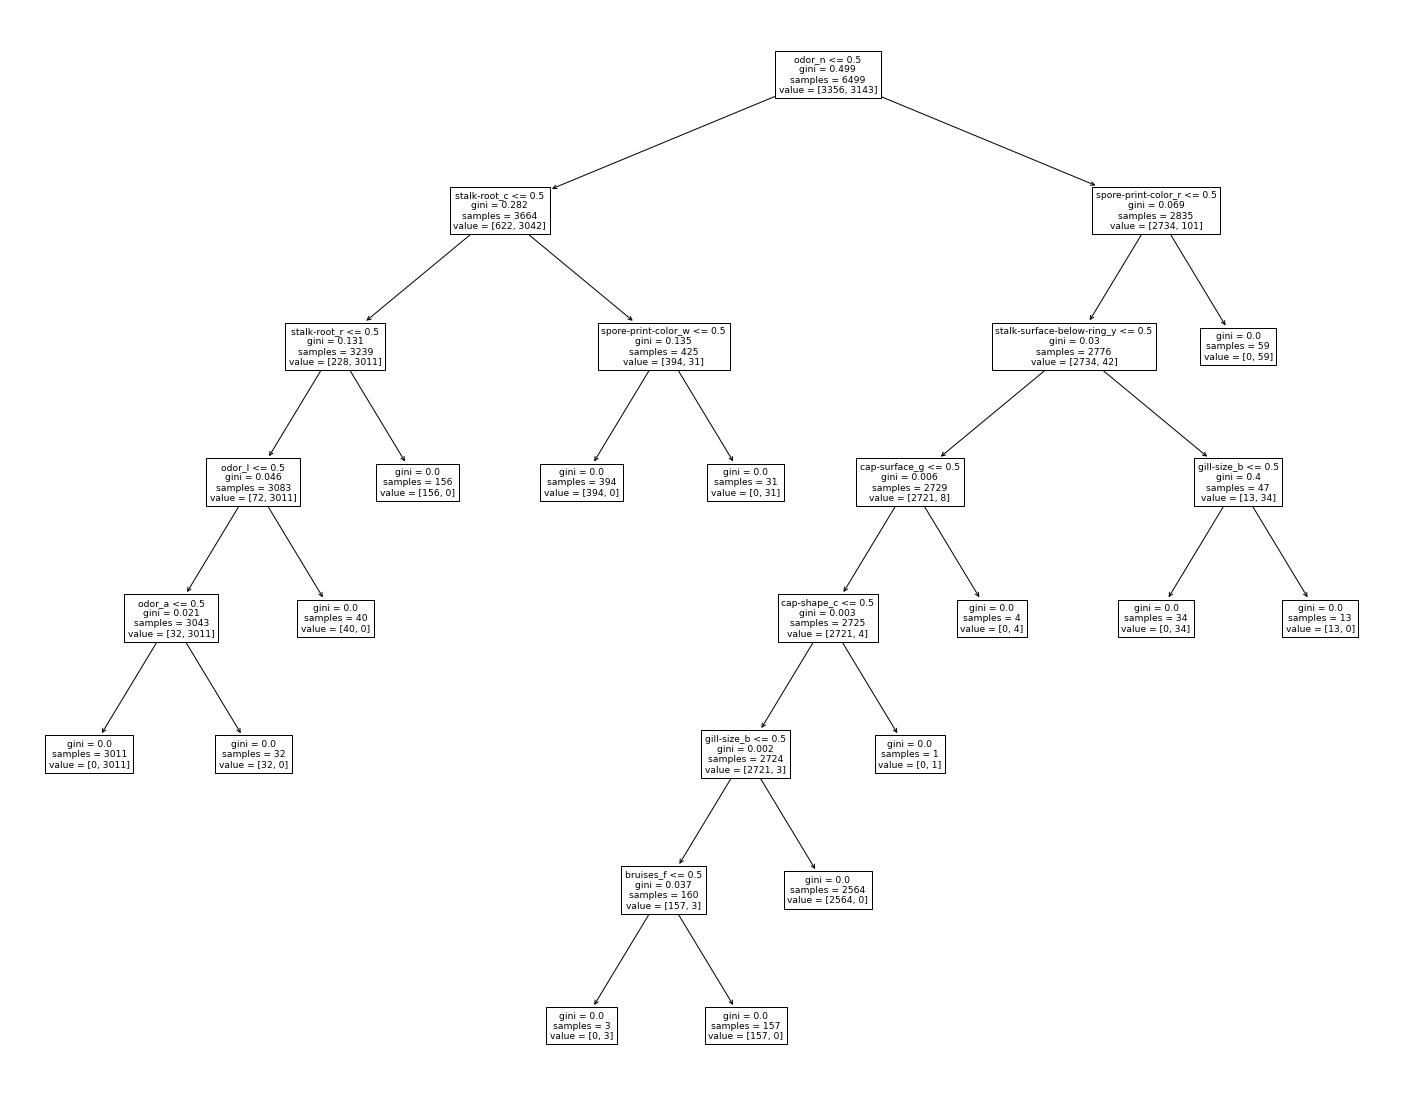

In [41]:
fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(classifier, 
#                    feature_names=dataset.X_train,  
#                    class_names=dataset.y_train,
#                    filled=True)
_=tree.plot_tree(classifier, feature_names=X_train.columns)

In [25]:
fig.savefig("decision_tree.png")

NameError: name 'tree' is not defined